<a href="https://colab.research.google.com/github/raihan-tanvir/bengali-hwcr/blob/master/bhwcr-v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#!git clone https://github.com/raihantanvir140/pix2pix-tensorflow.git
#!wget https://www.dropbox.com/s/55bhfr3ycvsewsi/CMATERdb%203.1.2.rar
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
%tensorflow_version 1.x

Mounted at /content/drive


In [11]:
#!unrar x CMATERdb\ 3.1.2.rar -idq
#!p7zip -d '/content/drive/Shared drives/4.2/SoftcomProject/ekush_bhwcr/pad.7z'
!unzip pad.zip

unzip:  cannot find or open pad.zip, pad.zip.zip or pad.zip.ZIP.


In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from fastai.vision import *
import random


In [3]:
np.random.seed(1)
bs=64
size=28
data = ImageDataBunch.from_folder("male_squre", train='.', valid_pct=0.2, size=size, bs=bs,
                                  ds_tfms=get_transforms(do_flip=False),  num_workers=4)
data = data.normalize(imagenet_stats)

NameError: ignored

In [ ]:
print(len(data.train_ds))
print(len(data.valid_ds))
print(data.c, data.classes)

144232
36057
122 ['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [1]:
data.show_batch(rows=4, figsize=(5, 5))

NameError: ignored

In [ ]:
from fastai.metrics import accuracy 
learn = cnn_learner(data, models.resnet50, metrics = [accuracy])
learn.fit_one_cycle(30)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,time
0,3.925877,3.331836,0.237929,05:44
1,3.086453,2.695943,0.339130,05:38
2,2.320579,1.913326,0.494273,05:48
3,1.756968,1.341645,0.632166,05:56
4,1.375986,1.015342,0.713981,05:56
5,1.118253,0.792645,0.779349,06:00
6,0.994946,0.683300,0.805475,05:52
7,0.858750,0.604406,0.829908,05:33
8,0.809115,0.552431,0.843858,05:24
9,0.719177,0.513460,0.854480,05:20


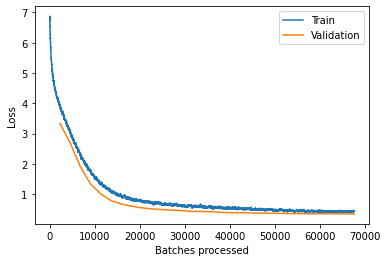

In [ ]:
learn.recorder.plot_losses()
learn.save('bhwcr-freeze-30')

In [ ]:
from fastai.metrics import accuracy 
learn = cnn_learner(data, models.resnet50, metrics = [accuracy])
learn.load('bhwcr-freeze-30')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


Learner(data=ImageDataBunch;

Train: LabelList (144232 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
81,81,81,81,81
Path: male_squre;

Valid: LabelList (36057 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
38,4,105,52,90
Path: male_squre;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3,

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-06
Min loss divided by 10: 1.32E-05


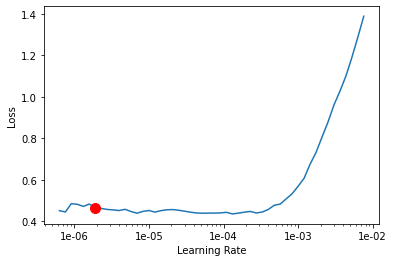

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(20, max_lr=slice(1e-06, 1e-05))
learn.save('bhwcr-unfreeze-20')

epoch,train_loss,valid_loss,accuracy,time
0,0.442622,0.350906,0.901711,04:21
1,0.441207,0.345438,0.902626,04:14
2,0.410408,0.344464,0.902210,04:16
3,0.427189,0.340609,0.903763,04:16
4,0.421435,0.343715,0.903347,04:17
5,0.397395,0.331003,0.906565,04:23
6,0.399555,0.326403,0.908756,04:38
7,0.382721,0.322770,0.908811,04:44
8,0.391358,0.323038,0.909088,04:49
9,0.377591,0.316868,0.910336,04:45


In [ ]:
interp_0 = ClassificationInterpretation.from_learner(learn)

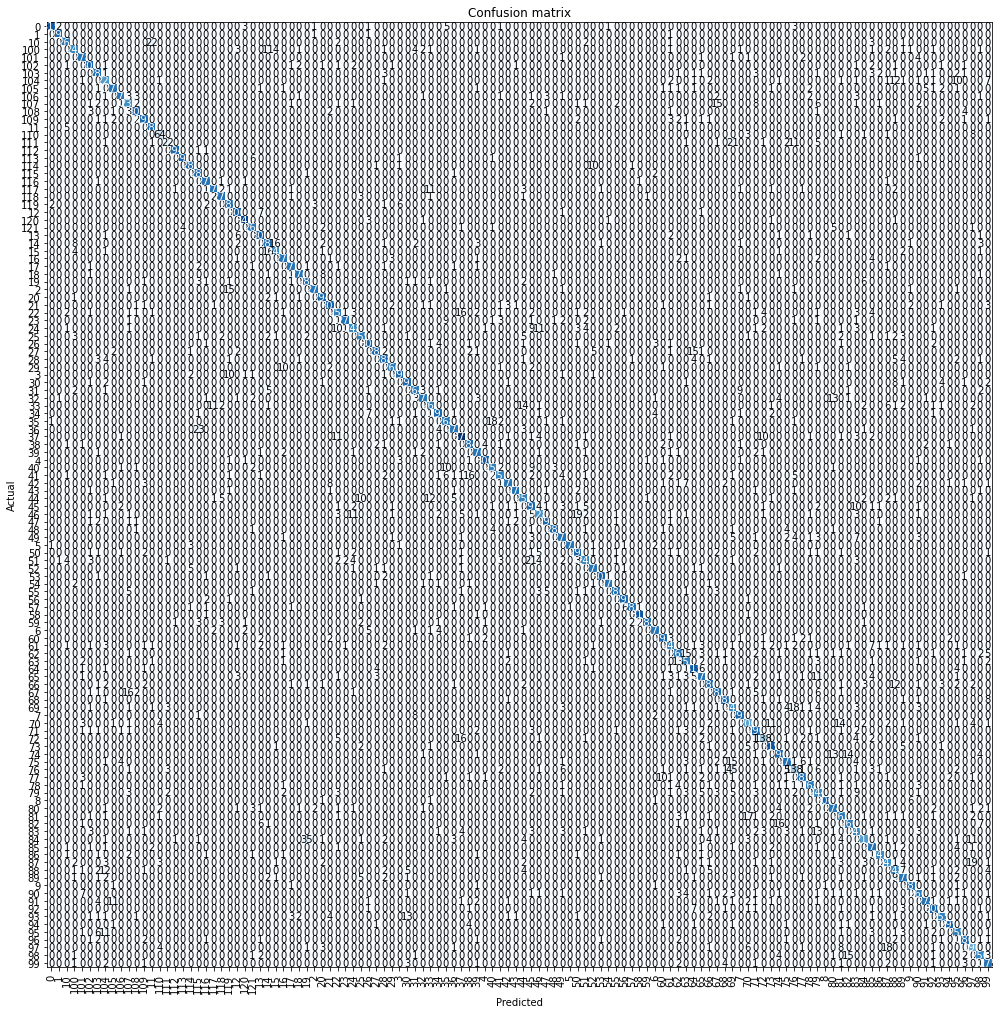

In [ ]:
interp_0.plot_confusion_matrix(figsize=(14,14))

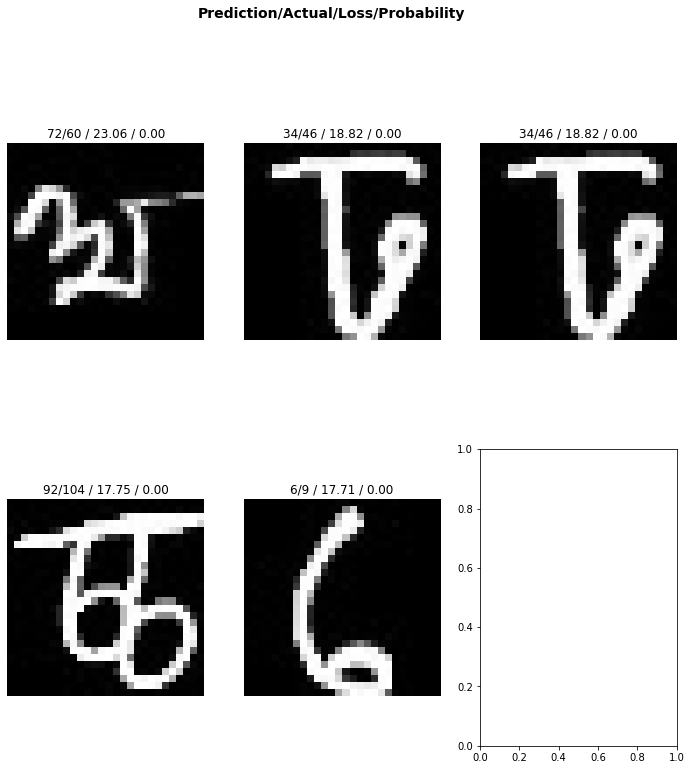

In [ ]:
interp_0.plot_top_losses(5)

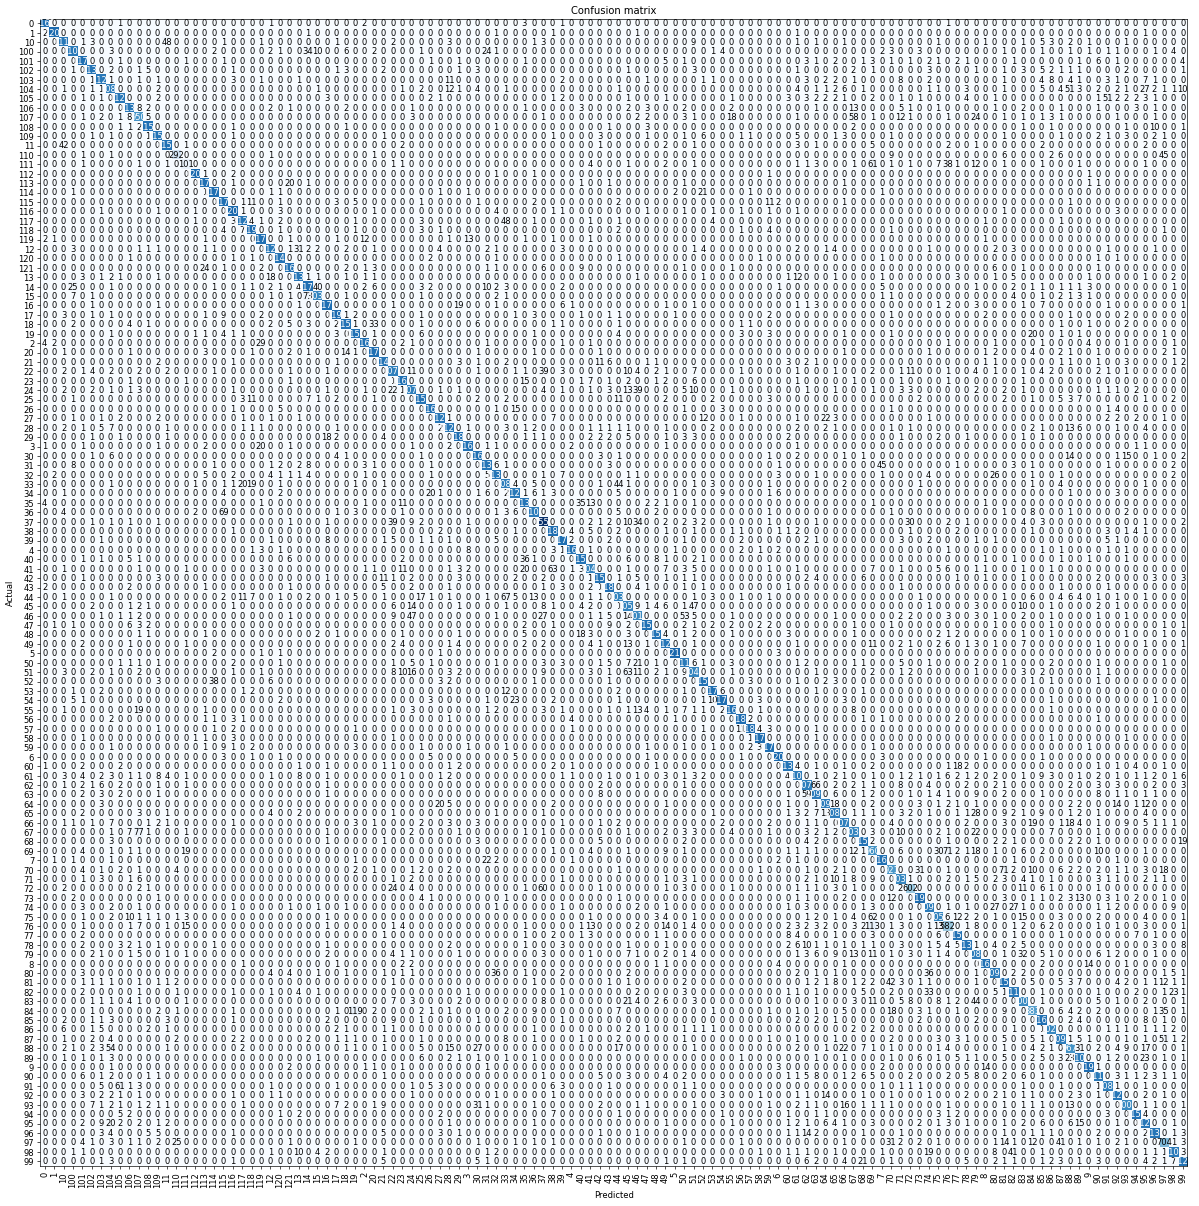

In [ ]:
interp_1 = ClassificationInterpretation.from_learner(learn, ds_type=DatasetType.Train)
interp_1.plot_confusion_matrix(figsize=(20,20), dpi=60)

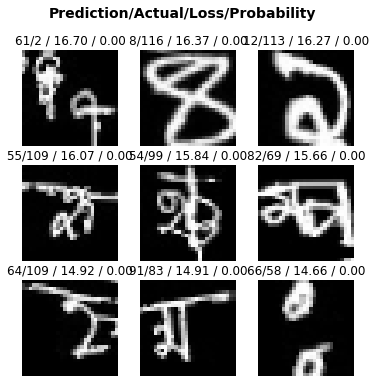

In [ ]:
interp_1.plot_top_losses(9, figsize=(6,6))

In [ ]:
learn.validate(data.train_dl)

[0.2369414, tensor(0.9312)]

In [ ]:
def evaluate_model_from_interp(interp, data):

    print(f'Pred -> GroundTruth')
    
    ok_pred = 0
    
    for idx, raw_p in enumerate(interp.preds):
        pred = np.argmax(raw_p)
        print(f'{pred} -> {interp.y_true[idx]}')
        if pred == interp.y_true[idx]:
           ok_pred += 1
    
    acc = ok_pred / len(interp.y_true)
    print(f'Overall accuracy of the model: {acc:0.5f}')

In [ ]:
evaluate_model_from_interp(interp_0, data)

Streaming output truncated to the last 5000 lines.
92 -> 92
97 -> 97
84 -> 84
84 -> 84
51 -> 51
27 -> 27
38 -> 38
71 -> 71
12 -> 12
117 -> 117
117 -> 117
113 -> 113
87 -> 87
17 -> 17
55 -> 55
82 -> 82
76 -> 76
25 -> 25
84 -> 84
41 -> 41
63 -> 39
44 -> 44
67 -> 67
67 -> 67
36 -> 36
79 -> 79
79 -> 79
95 -> 95
56 -> 56
60 -> 60
13 -> 13
5 -> 5
43 -> 43
106 -> 106
19 -> 19
17 -> 17
29 -> 29
9 -> 9
20 -> 20
66 -> 66
23 -> 23
6 -> 6
20 -> 20
114 -> 114
111 -> 111
76 -> 76
95 -> 95
24 -> 24
18 -> 18
6 -> 6
32 -> 32
54 -> 54
70 -> 70
10 -> 10
90 -> 90
34 -> 34
9 -> 9
36 -> 36
22 -> 22
106 -> 106
10 -> 10
44 -> 44
42 -> 42
32 -> 32
95 -> 95
54 -> 54
86 -> 86
49 -> 49
69 -> 69
55 -> 55
29 -> 29
119 -> 119
68 -> 68
44 -> 44
54 -> 54
40 -> 40
103 -> 120
45 -> 45
96 -> 15
114 -> 114
83 -> 83
9 -> 9
13 -> 13
37 -> 10
7 -> 7
118 -> 118
36 -> 36
25 -> 25
35 -> 35
74 -> 74
82 -> 82
47 -> 47
17 -> 17
27 -> 27
105 -> 105
70 -> 70
64 -> 64
83 -> 83
55 -> 76
33 -> 33
107 -> 107
61 -> 61
37 -> 38
78 -> 78
8

In [ ]:
from fastai.metrics import accuracy 
learn = cnn_learner(data, models.resnet50, metrics = [accuracy])
learn.load('/content/drive/Shared drives/4.2/SoftcomProject/ekush_bhwcr/bhwcr-unfreeze-20')

Learner(data=ImageDataBunch;

Train: LabelList (144232 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
81,81,81,81,81
Path: male_squre;

Valid: LabelList (36057 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
38,4,105,52,90
Path: male_squre;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3,

In [ ]:
#preds,y,losses =learn.get_preds(with_loss=True,ds_type=DatasetType.Valid)
interp_0.most_confused()

[('76', '69', 45),
 ('84', '19', 35),
 ('36', '115', 23),
 ('10', '11', 22),
 ('111', '69', 21),
 ('51', '45', 21),
 ('46', '50', 19),
 ('87', '97', 19),
 ('35', '40', 18),
 ('69', '76', 18),
 ('97', '87', 18),
 ('81', '70', 17),
 ('14', '15', 16),
 ('15', '14', 16),
 ('22', '37', 16),
 ('41', '38', 16),
 ('67', '107', 16),
 ('72', '37', 16),
 ('82', '74', 16),
 ('107', '67', 15),
 ('2', '119', 15),
 ('27', '64', 15),
 ('62', '63', 15),
 ('75', '69', 15),
 ('98', '82', 15),
 ('33', '44', 14),
 ('70', '81', 14),
 ('74', '82', 14),
 ('32', '80', 13),
 ('63', '62', 13),
 ('74', '80', 13),
 ('83', '79', 13),
 ('93', '30', 13),
 ('104', '88', 12),
 ('44', '33', 12),
 ('66', '88', 12),
 ('88', '104', 12),
 ('100', '14', 11),
 ('111', '76', 11),
 ('117', '33', 11),
 ('24', '46', 11),
 ('33', '117', 11),
 ('37', '22', 11),
 ('46', '24', 11),
 ('65', '79', 11),
 ('70', '73', 11),
 ('84', '97', 11),
 ('91', '105', 11),
 ('95', '104', 11),
 ('104', '95', 10),
 ('114', '52', 10),
 ('24', '22', 10)

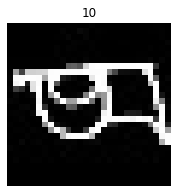

In [ ]:
img = open_image("/content/female_squre/10/1_B.BARIA_11_1_319.jpg")
preds = learn.predict(img)
img.show(y=preds[0])

In [ ]:
test = ImageDataBunch.from_folder("male_squre", train='.', valid_pct=0.2, size=size, bs=bs,
                                  ds_tfms=get_transforms(do_flip=False),  num_workers=4)
test = test.normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/fastai/vision/image.py:434: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if ax is None: fig,ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.6/dist-packages/fastai/vision/image.py:434: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if ax is None: fig,ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.6/dist-packages/fastai/vision/image.py:434: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until e

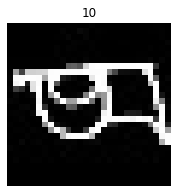

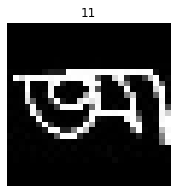

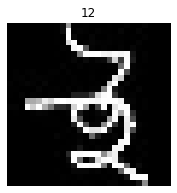

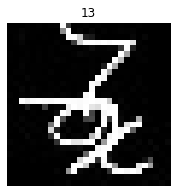

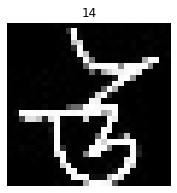

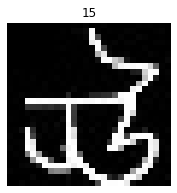

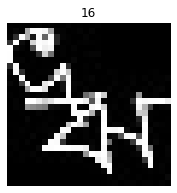

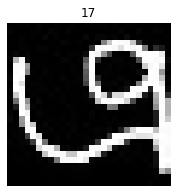

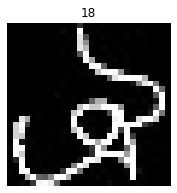

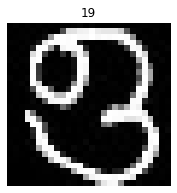

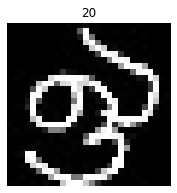

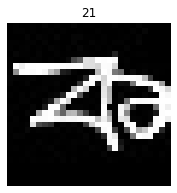

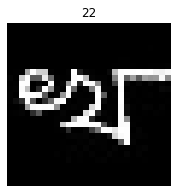

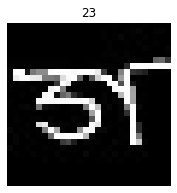

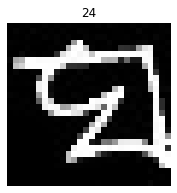

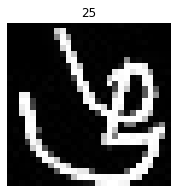

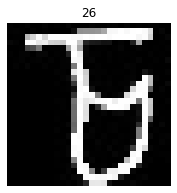

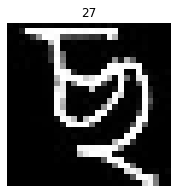

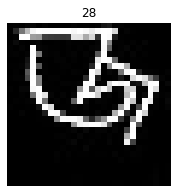

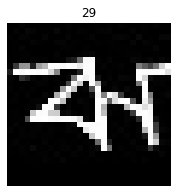

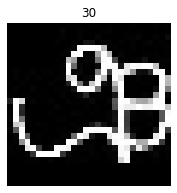

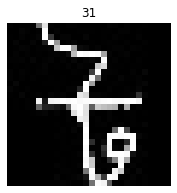

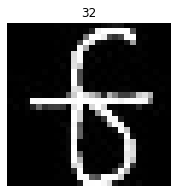

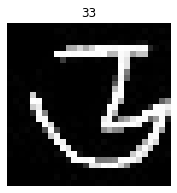

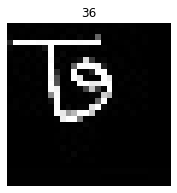

In [ ]:
for i in range(10,35):
  try:
    img = open_image("/content/female_squre/"+str(i)+"/1_B.BARIA_11_1_319.jpg")
  except:
    continue
  preds = learn.predict(img)
  img.show(y=preds[0])
